### Initial Setup & Import Libraries

In [69]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [70]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

### Data Loading

In [71]:
df #dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [72]:
df.head() #head of the dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


  ***Data Dictionary***
 * Pregnancies: Number of times pregnant
 * Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
 * BloodPressure: Diastolic blood pressure (mm Hg)
 * SkinThickness: Triceps skin fold thickness (mm)
 * Insulin: 2-Hour serum insulin (mu U/ml)
 * BMI: Body mass index (weight in kg/(height in m)^2)
 * DiabetesPedigreeFunction: Diabetes pedigree function 
 * Age: Age (years) 
 * Outcome (target): Class variable (0 or 1) 268 of 768 are 1, the others are 0

### Data Overview

In [73]:
df.shape

(768, 9)

In [74]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


* The people presengt in the dataset have people who got pregnanat 17 times
* Glucose: The mean glucose level is 120 with minimum as 0
* Blood Pressure: The BP score goes maximum upto 122 with mean as 19
* Skin Thickeness: The maximum thickness is 99
* Insulin: The mean is 80 and the maximum insulin count is 846
* BMI: The mean BMI is 32 and goes maximum upto 67
* DiabetesPedigreeFunction: The maximum DiabetesPedigreeFunction is 2.42
* Age: Mean age of people having dibetese is 33 and maximum upto 81
* Outcome is a Target varaiable, we will check the distribution. 

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


***We can see total of 768 columns and the Integer type columns are 7 and 2 float type.***

### Initial Data Inspection

In [76]:
df.isnull().sum() #Checking for any missing values. 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

> We will check each column for its quality. 

In [77]:
for i in df.columns:
    print(i.capitalize())
    print(df[i].unique())
    print('- ' * 50)

Pregnancies
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Glucose
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Bloodpressure
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95

In [78]:
df[df == 0].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

**We can see multiple 0 values in various columns, we have to refer to additional documnets to understand if the these parametres are desired to be 0 or not, and we will treat them accordingly.**

* Pregnancies can definelty be 0. 
* Glucose, Note that, in the absence of insulin (control), the intracellular glucose concentration remains near zero, despite high extracellular glucose concentrations. So we will keep the 0 values. 
* Zero BP can be beacuse of faulty monitor and we should drop the values. 
* 227 zero value represent complete absence of fat under the skin, which is unlikely. So we will replace it with the meadian or mean. 
* BMI can not be zero. 

In [79]:
df['BloodPressure'].replace(0, np.nan, inplace=True)
df['SkinThickness'].replace(0, np.nan, inplace=True)
df['BMI'].replace(0, np.nan, inplace=True)

/tmp/ipykernel_36/834449850.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BloodPressure'].replace(0, np.nan, inplace=True)
/tmp/ipykernel_36/834449850.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [80]:
df.isnull().sum() #Checking the null values

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

We can see the  null values, we will replace them with mean or median. Null values are not considered in the calculation of Mean or Median in Pandas

In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**We can see that the mean and median of all the columns with missing values is very close to each other, so we have replaced all the null values with the column's null value.**

In [82]:
df.fillna(df.median(), inplace=True) #Replacing the null Values in the DS with Median

### Data Cleaning

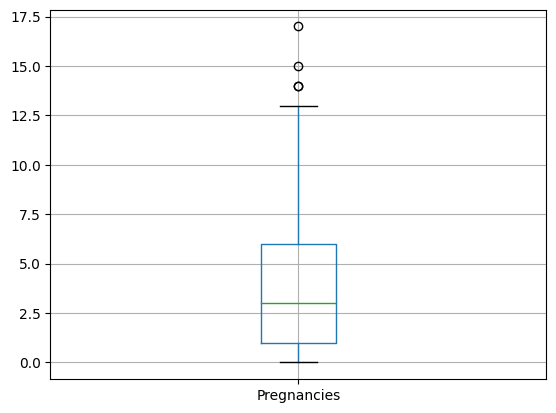

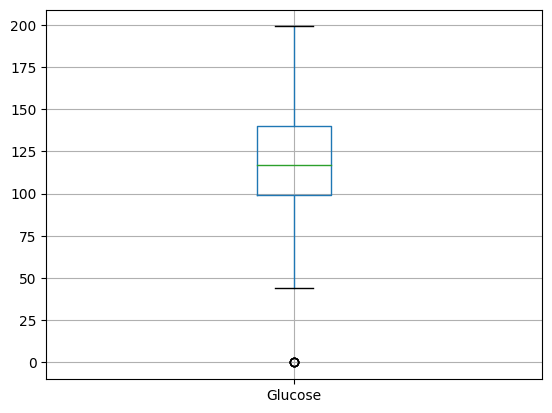

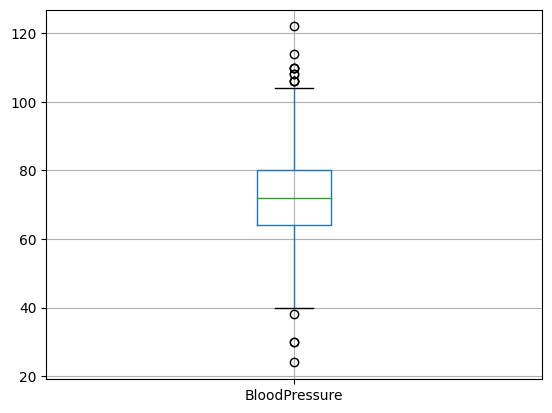

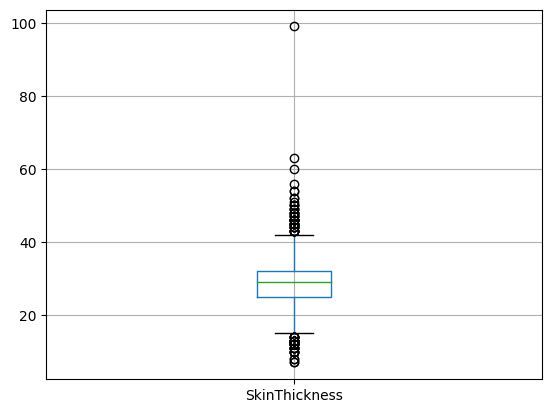

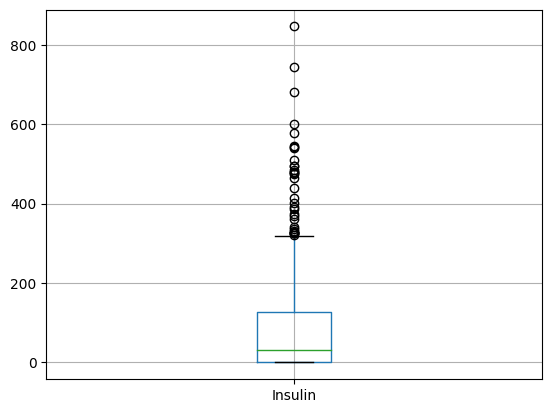

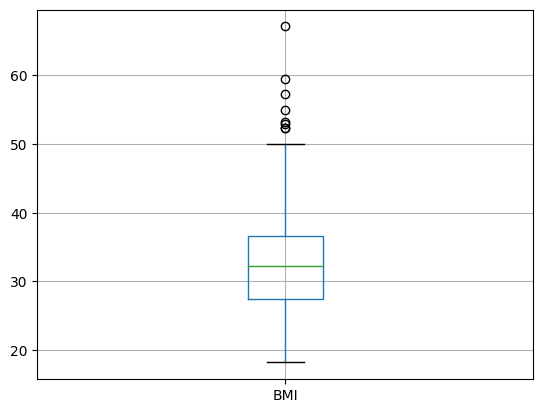

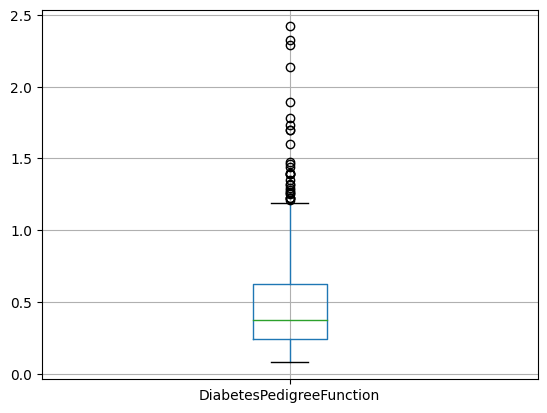

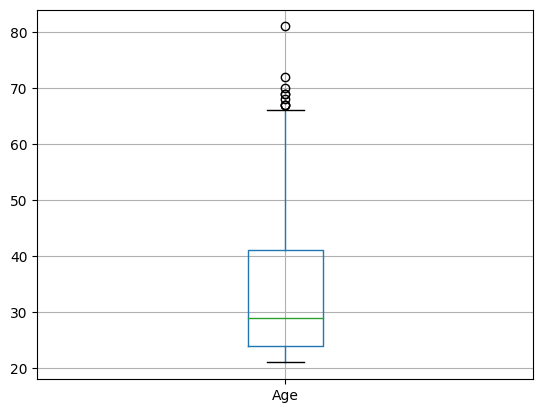

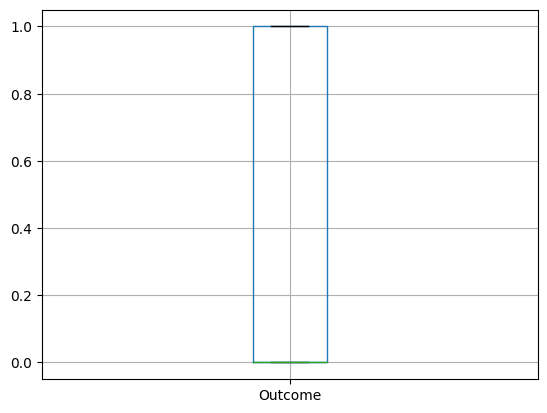

In [83]:
for i in df.columns:
    df.boxplot(column=i)
    plt.show()

In [84]:
df.describe(percentiles=[0.94, 0.95, 0.96, 0.97, 0.98, 0.99]).T

,count,mean,std,min,50%,94%,95%,96%,97%,98%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,3.0000,10.00000,10.00000,11.00000,11.00000,12.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,117.0000,179.00000,181.00000,184.00000,187.99000,192.32000,196.00000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,72.0000,90.00000,90.00000,92.00000,94.99000,99.32000,106.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,29.0000,43.00000,44.00000,45.32000,46.00000,48.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,30.5000,276.96000,293.00000,325.00000,369.90000,470.94000,519.90000,846.00
BMI,768.0,32.455208,6.875177,18.200,32.3000,43.50000,44.39500,45.33200,46.10000,47.52600,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.3725,1.05654,1.13285,1.18424,1.25793,1.39066,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,29.0000,56.98000,58.00000,60.00000,62.00000,64.66000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.0000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00


* We will cap pregnencies at 99th percentile.
* No Outlier treatment will be required for Glucose.
* Will cap BP at 99th percentile. 
* We will cap Skin Thickness at 99th percentile.

In [85]:
df['Pregnancies'] = np.where(df['Pregnancies'] > df['Pregnancies'].quantile(.99), df['Pregnancies'].quantile(.99), df['Pregnancies'])

In [86]:
df['BloodPressure'] = np.where(df['BloodPressure'] > df['BloodPressure'].quantile(.99), df['BloodPressure'].quantile(.99), df['BloodPressure'])
df['SkinThickness'] = np.where(df['SkinThickness'] > df['SkinThickness'].quantile(.99), df['SkinThickness'].quantile(.99), df['SkinThickness'])

In [87]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0,33.6,0.627,50,1
1,1.0,85,66.0,29.0,0,26.6,0.351,31,0
2,8.0,183,64.0,29.0,0,23.3,0.672,32,1
3,1.0,89,66.0,23.0,94,28.1,0.167,21,0
4,0.0,137,40.0,35.0,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101,76.0,48.0,180,32.9,0.171,63,0
764,2.0,122,70.0,27.0,0,36.8,0.340,27,0
765,5.0,121,72.0,23.0,112,26.2,0.245,30,0
766,1.0,126,60.0,29.0,0,30.1,0.349,47,1


In [ ]:
model.coef_[0]

### Exploratory Data Analysis (EDA)
* Univariate Analysis
* Bivariate Analysis
* Multivariate Analysis

### Feature Engineering
* Create New Features
* Encoding Categorical Data
* Scaling and Normalization

### Final Dataset Preparation
* Drop Unnecessary Columns